In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [7]:
# Set Working Directory
import os
working_dir = "/Users/muhammadsaad/Desktop/Data Science Project"
os.chdir(working_dir)

#### Scraping Fox 5 Washington DC Page ####

In [9]:
# Function to scrape 3 pages at a time
def scrape_pages(start_page, total_pages=3):
    news_data = []
    for page in range(start_page, start_page + total_pages):
        url = f"https://www.fox5dc.com/tag/us/dc?page={page}"  
        print(f"Scraping page {page}: {url}")
        
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        
        articles = soup.select(".post")  

        for article in articles:
            title_tag = article.select_one(".title a")
            title = title_tag.text.strip() if title_tag else "No title"
            
            summary_tag = article.select_one(".dek")
            summary = summary_tag.text.strip() if summary_tag else "No summary"
            
            date_tag = article.select_one(".time")
            date = date_tag.text.strip() if date_tag else "No date"
            
            article_link = title_tag['href'] if title_tag else None
            full_article = get_full_article(article_link) if article_link else "No full article"
            
            news_data.append({
                "Title": title,
                "Summary": summary,
                "Date": date,
                "Full_Article": full_article
            })
        
        time.sleep(5)  # Sleep to avoid getting blocked
    
    # Convert the results to a pandas DataFrame
    news_df = pd.DataFrame(news_data)
    
    # Save to CSV
    news_df.to_csv(f"news_data_{start_page}-{start_page + total_pages - 1}.csv", index=False)
    
    # Display the DataFrame
    return news_df

In [11]:
def get_full_article(url):
    if url is None:
        return "No full article"
    
    full_url = f"https://www.fox5dc.com{url}"  
    response = requests.get(full_url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Extract the article content
    article_content = soup.select(".article-body > p")  
    
    if article_content:
        # Combine the text from all <p> tags into a single string
        full_text = " ".join(p.get_text(strip=True) for p in article_content)
        return full_text
    
    return "No content available"

In [94]:
# Scrape 3 pages at 
start_page = 115  # Set page number to specify scraping
news_df = scrape_pages(start_page, total_pages=3)

# Display the DataFrame in Jupyter
import IPython.display as display
display.display(news_df)

Scraping page 115: https://www.fox5dc.com/tag/us/dc?page=115
Scraping page 116: https://www.fox5dc.com/tag/us/dc?page=116
Scraping page 117: https://www.fox5dc.com/tag/us/dc?page=117


,Title,Summary,Date,Full_Article
0,DC parking spots turn into public parks for th...,The 17th PARK(ing) Day is coming to nine locat...,"September 15, 2023 10:13am EDT",WASHINGTON-The 17th PARK(ing) Day is coming to...
1,DC police arrest man suspected in 2 homicides ...,Metropolitan Police says a man has been arrest...,"September 14, 2023 4:31pm EDT",WASHINGTON-Metropolitan Policesays a man has b...
2,NASA UFO panel recommends additional research ...,"Back in June 2022, NASA announced that it was ...","September 14, 2023 3:32pm EDT","WASHINGTON-Back in June 2022, NASA announced t..."
3,H Street Festival returns to DC this weekend: ...,"The annual ""Battle for the Real HU"" and H Stre...","September 14, 2023 1:05pm EDT","WASHINGTON-The annual ""Battle for the Real HU""..."
4,Pickleball coming to National Mall in DC,Pickleball – one of America's newest and most ...,"September 14, 2023 7:20am EDT",WASHINGTON-Pickleball – one of America's newes...
5,Driver trapped in vehicle that overturned afte...,Emergency crews freed the trapped driver of a ...,"September 14, 2023 6:59am EDT",WASHINGTON-Emergency crews freed the trapped d...
6,Man shot near 2 DC schools,Authorities are investigating a shooting that ...,"September 14, 2023 6:21am EDT",WASHINGTON-Authorities are investigating ashoo...
7,Connecticut Ave bike lane battle reaches boili...,The debate over Connecticut's bike lanes has r...,"September 13, 2023 7:18pm EDT",WASHINGTON-Thedebate over Connecticut's bike l...
8,DC Housing Authority appoints Keith Pettigrew ...,The man now tasked with revamping D.C.'s Housi...,"September 13, 2023 6:26pm EDT",WASHINGTON-The man now tasked with revampingD....
9,Maryland named third happiest state in America...,"In a new study released by WalletHub, Maryland...","September 13, 2023 11:53am EDT","BETHESDA, Md.-In a new study released byWallet..."


##### *Note*: I have combined all the dataframes scraped as a CSV file as a single data frame. For now the scraped stories include upto page 117 of the URL, which is stories from September 2023 till December 5 2024 #####

In [13]:
# Load the combined data frame 
import pandas as pd
FOX5_stories = pd.read_csv("FOX5_DC_News.csv")
print(FOX5_stories.head())  # Displays the first 5 rows
print(FOX5_stories.info())

                                               Title  \
0  DC Weather: Gusty winds could reach 55mph Thur...   
1  2024 National Christmas Tree Lighting Ceremony...   
2  Musk, Ramaswamy in DC Thursday to discuss DOGE...   
3  Traffic closures for National Christmas Tree L...   
4  Political Patties, DC bar that faced online ou...   

                                             Summary  \
0  Parts of the Washington, D.C. region could see...   
1  The 102nd National Christmas Tree Lighting Cer...   
2  Elon Musk and Vivek Ramaswamy are expected to ...   
3  The 102nd National Christmas Tree Lighting Cer...   
4  A bar on U Street in Washington, D.C. is closi...   

                           Date  \
0  December 5, 2024 11:04am EST   
1  December 5, 2024 10:38am EST   
2   December 5, 2024 9:10am EST   
3  December 4, 2024 10:52pm EST   
4   December 4, 2024 9:03pm EST   

                                        Full_Article  
0  WASHINGTON-A Wind Advisory is in effect until ...  
1  WA

In [15]:
# Check for data type of the data frame contents
print(FOX5_stories.dtypes)

Title           object
Summary         object
Date            object
Full_Article    object
dtype: object


In [17]:
# Convert all the non-date columns into lower case strings 
date_column = "Date"
for col in FOX5_stories.columns:
    if col != date_column:
        FOX5_stories[col] = FOX5_stories[col].str.lower()

In [118]:
#Convert date column into mm/dd/yyyy format 
FOX5_stories["Date"] = pd.to_datetime(
    FOX5_stories["Date"], errors="coerce", utc=True
).dt.date  # Extract only the date part
FOX5_stories["Date"] = FOX5_stories["Date"].apply(lambda x: x.strftime("%m/%d/%Y") if pd.notnull(x) else None)

FOX5_stories["Date"] = pd.to_datetime(FOX5_stories["Date"], errors="coerce")
FOX5_stories["Date"] = FOX5_stories["Date"].dt.tz_localize(None).dt.strftime("%m/%d/%Y")

In [19]:
# Check to see the updated data frame 
print(FOX5_stories.head())

                                               Title  \
0  dc weather: gusty winds could reach 55mph thur...   
1  2024 national christmas tree lighting ceremony...   
2  musk, ramaswamy in dc thursday to discuss doge...   
3  traffic closures for national christmas tree l...   
4  political patties, dc bar that faced online ou...   

                                             Summary  \
0  parts of the washington, d.c. region could see...   
1  the 102nd national christmas tree lighting cer...   
2  elon musk and vivek ramaswamy are expected to ...   
3  the 102nd national christmas tree lighting cer...   
4  a bar on u street in washington, d.c. is closi...   

                           Date  \
0  December 5, 2024 11:04am EST   
1  December 5, 2024 10:38am EST   
2   December 5, 2024 9:10am EST   
3  December 4, 2024 10:52pm EST   
4   December 4, 2024 9:03pm EST   

                                        Full_Article  
0  washington-a wind advisory is in effect until ...  
1  wa

##### Now I will define a dictionary which includes crime-related words to parse through the data frame and remove all those rows or news stories which are not related to crime. The words in the dictionary have been developed by manually going through around 50 crime related news stories for DC and picking out key words. I will run the filter operation on the Full_Article text as it has the richest words details #####

In [96]:
# Define dictionary to filter only crime-related news stories 
crime_keywords = [
    "homicide", "murder", "killing", "manslaughter", "shooting", "shoot", "sex abuse", "rape", 
    "assault", "domestic violence", "gender violence", "assault with dangerous weapon", 
    "aggravated assault", "attempted", "battery", "robbery", "theft", "mugging", "beat up", 
    "stealing", "steal" "robbing", "burglary", "break in", "forced entry", "housebreaking", 
    "trespassing", "auto theft", "motor vehicle theft", "carjacking", "vehicle larceny", 
    "arson", "destruction of property", "set on fire", "sentenced", "charges", "charged", 
    "deadly", "fatal", "beating", "punching", "punched", "punches", "punch", "kicking", 
    "kicked", "death", "gunshot", "gun", "gunfire", "arrested", "ammo", "ammunition", 
    "shot", "abuse", "attack", "attacked", "kidnapped", "kidnap", "victim", "hate", "ransack", "stolen", 
    "robbed", "gunpoint", "firearms", "carjack", "violent", "guilty", "armed", "scam"
] 

crime_related_stories = FOX5_stories[
    FOX5_stories["Full_Article"].str.contains("|".join(crime_keywords), case=False, na=False)
]

# Display the filtered dataframe
print(crime_related_stories.head())

                                                Title  \
4   political patties, dc bar that faced online ou...   
5   13-year-old girl sentenced to 7 years for 2023...   
7   video circulates of suspect 'bragging' about f...   
9   photo released of 2 suspects involved in dc ar...   
10  police id teen gunned down at dc denny's resta...   

                                              Summary  \
4   a bar on u street in washington, d.c. is closi...   
5   a young teenager will spend the next seven yea...   
7   the d.c. man who police say fatally shot a bel...   
9   four suspects remain at large following an arm...   
10  authorities have identified the teen shot and ...   

                           Date  \
4   December 4, 2024 9:03pm EST   
5   December 4, 2024 8:51pm EST   
7   December 4, 2024 3:54pm EST   
9   December 4, 2024 9:51am EST   
10  December 4, 2024 8:52am EST   

                                         Full_Article  
4   fox 5 exclusive-a bar on u street in washin

In [100]:
# Save the updated data frame 
# Save the filtered dataframe to a CSV file
crime_related_stories.to_csv("FOX5_crime_related_stories.csv", index=False, encoding="utf-8")

In [23]:
#Check for the length of the updated data frame
len(crime_related_stories)

1369

##### I am now going to randomly select 50 news stories from the updated data set to manually code them for the *type of crime*, the *locality of the crime* and the *personal characteristics of the perpetrator/victim* involved #####

In [133]:
# Randomly select 50 news stories 
sampled_data_crime_stories = crime_related_stories.sample(n=50, random_state=42)

In [135]:
# Add columns for labeling locality and characteristics
sampled_data_crime_stories['Crime_Type'] = None         # Label for type of crime
sampled_data_crime_stories['Locality'] = None           # Label for locality
sampled_data_crime_stories['Personal_Characteristics'] = None   # Label for perpetrator/victim traits

# Export for manual labeling
sampled_data_crime_stories.to_csv("sampled_stories_for_labeling.csv", index=False)

In [18]:
# import nltk methods

# stopwords
from nltk.corpus import stopwords

# tokenizer
from nltk.tokenize import word_tokenize

# lemmatizer
from nltk.stem import WordNetLemmatizer

# stemming
from nltk.stem.porter import PorterStemmer

import numpy as np

In [20]:
# Set up stop_words for preprocessing 
from nltk.corpus import stopwords

# Load the standard English stop words
stop_words = set(stopwords.words("english"))

# Add custom stop words
custom_stop_words = {"washington", "d.c.", "fox 5"}
stop_words.update(custom_stop_words)

# Confirm the additions
print("washington" in stop_words)  
print("d.c." in stop_words) 
print("fox 5" in stop_words)

True
True
True


##### Removed "washington", "d.c.", and "fox 5" as stop words since they appear at the start of every news story and are not relevant to analysis #####

In [22]:
# Initialize the other processors for preprocessing
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Normalization
    tokens = [word for word in tokens if word not in stop_words]  # Stopword Removal
    tokens = [porter.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Preprocess Full_Article for both datasets
crime_related_stories["processed_article"] = crime_related_stories["Full_Article"].apply(preprocess_text)

/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_26687/371029886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_related_stories["processed_article"] = crime_related_stories["Full_Article"].apply(preprocess_text)


In [26]:
# Load the labeled stories data frame 
labeled_sampled_stories = pd.read_csv("/Users/muhammadsaad/Desktop/Data Science Project/labeled_sampled_stories.csv")

In [29]:
# Check for column headings of the labeled stories data frame 
print(labeled_sampled_stories.columns)

Index(['Title', 'Summary', 'Date', 'Full_Article', 'Crime_Type', 'Locality',
       'Personal_Characteristics'],
      dtype='object')


In [31]:
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Normalization
    tokens = [word for word in tokens if word not in stop_words]  # Stopword Removal
    tokens = [porter.stem(word) for word in tokens]  # Stemming
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Preprocess Full_Article column
if "Full_Article" in crime_related_stories.columns:
    crime_related_stories["processed_article"] = crime_related_stories["Full_Article"].apply(preprocess_text)
else:
    print("Full_Article column not found in crime_related_stories.")

if "Full_Article" in labeled_sampled_stories.columns:
    labeled_sampled_stories["processed_article"] = labeled_sampled_stories["Full_Article"].apply(preprocess_text)
else:
    print("Full_Article column not found in labeled_sampled_stories.")

# Ensure all multi-label columns are lowercase
for col in ["Crime_Type", "Locality", "Personal_Characteristics"]:
    if col in labeled_sampled_stories.columns:
        labeled_sampled_stories[col] = labeled_sampled_stories[col].str.lower()

/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_19166/58711952.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_related_stories["processed_article"] = crime_related_stories["Full_Article"].apply(preprocess_text)


In [27]:
print(crime_related_stories.head())

                                                Title  \
4   political patties, dc bar that faced online ou...   
5   13-year-old girl sentenced to 7 years for 2023...   
7   video circulates of suspect 'bragging' about f...   
9   photo released of 2 suspects involved in dc ar...   
10  police id teen gunned down at dc denny's resta...   

                                              Summary  \
4   a bar on u street in washington, d.c. is closi...   
5   a young teenager will spend the next seven yea...   
7   the d.c. man who police say fatally shot a bel...   
9   four suspects remain at large following an arm...   
10  authorities have identified the teen shot and ...   

                           Date  \
4   December 4, 2024 9:03pm EST   
5   December 4, 2024 8:51pm EST   
7   December 4, 2024 3:54pm EST   
9   December 4, 2024 9:51am EST   
10  December 4, 2024 8:52am EST   

                                         Full_Article  
4   fox 5 exclusive-a bar on u street in washin

##### Attempt to develop new columns in the labeled sampled stories data frame which are binary variables based on the sub-category of the type of crime, locality, etc. 

In [25]:
# Function to encode multi-label columns
def encode_labels(df, column):
    # Extract and clean all unique labels
    unique_labels = set(
        label.strip().lower()  # strip whitespace and convert to lower case
        for labels in df[column].dropna()  # exclude NaN values
        for label in labels.split(",")  # split by commas
        if label.strip().lower() != "not relevant"  # exclude "Not relevant"
    )
    
    # Add a new binary column for each label
    for label in unique_labels:
        df[f"{column}_{label}"] = df[column].fillna("").apply(lambda x: int(label in x.lower()))  # compare lowercased labels
    
    return df

# Apply the encoding to the columns
for col in ["Crime_Type", "Locality", "Personal_Characteristics"]:
    labeled_sampled_stories = encode_labels(labeled_sampled_stories, col)

# Verify the result
print(labeled_sampled_stories.head())

NameError: name 'labeled_sampled_stories' is not defined

In [37]:
print(labeled_sampled_stories.columns)

Index(['Title', 'Summary', 'Date', 'Full_Article', 'Crime_Type', 'Locality',
       'Personal_Characteristics', 'processed_article', 'Crime_Type_',
       'Crime_Type_sex abuse', 'Crime_Type_robbery', 'Crime_Type_other',
       'Crime_Type_assault w/dangerous weapon',
       'Crime_Type_motor vehicle theft', 'Crime_Type_assault',
       'Crime_Type_burglary', 'Crime_Type_homicide', 'Locality_northwest',
       'Locality_northeast', 'Locality_southeast', 'Locality_southwest',
       'Personal_Characteristics_teen male',
       'Personal_Characteristics_adult female',
       'Personal_Characteristics_campus protest',
       'Personal_Characteristics_teen female',
       'Personal_Characteristics_child',
       'Personal_Characteristics_adult male'],
      dtype='object')


#### *Train a machine learning model* based on the labeled_sampled_stories data frame to classify each news item for the i). the type of crime ii). the locality iii). the personal characteristics of the victim/perpetrator. ####

##### Step 1: Prepare the X and Y labels 

In [39]:
X = labeled_sampled_stories["processed_article"]
Y = labeled_sampled_stories.filter(regex="Crime_Type_|Locality_|Personal_Characteristics_")

##### Step 2: Vectorize the processed_article column based on the TfidVectorizer 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the vectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.90)

# Fit and transform the training data (labeled_sampled_stories)
X_vec = vectorizer.fit_transform(X)  # X is the preprocessed 'processed_article' column of labeled_sampled_stories

# Transform the test data (crime_related_stories) using the fitted vectorizer
X_test_vec = vectorizer.transform(crime_related_stories["processed_article"])

# Check the shape of the transformed data
print(X_vec.shape)  # Training data shape
print(X_test_vec.shape)  # Test data shape

(50, 286)
(1369, 286)


##### Step 3: Separate the data into test and train to train the model #####

In [43]:
from sklearn.model_selection import train_test_split

# Split the labeled_sampled_stories into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, Y, test_size=0.2, random_state=42
)

##### Since it is possible to have multiple labels for each type of news story (for example, a particular news story may be about both a robbery and a homicide), we have to use a *Multi Label Classifier* to train the model ##### 

In [45]:
# Check whether all 
print(Y.dtypes)

Crime_Type_                                int64
Crime_Type_sex abuse                       int64
Crime_Type_robbery                         int64
Crime_Type_other                           int64
Crime_Type_assault w/dangerous weapon      int64
Crime_Type_motor vehicle theft             int64
Crime_Type_assault                         int64
Crime_Type_burglary                        int64
Crime_Type_homicide                        int64
Locality_northwest                         int64
Locality_northeast                         int64
Locality_southeast                         int64
Locality_southwest                         int64
Personal_Characteristics_teen male         int64
Personal_Characteristics_adult female      int64
Personal_Characteristics_campus protest    int64
Personal_Characteristics_teen female       int64
Personal_Characteristics_child             int64
Personal_Characteristics_adult male        int64
dtype: object


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, hamming_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vectorize text using Tfidf with ngrams
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', min_df=5, max_df=0.9, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_vec = vectorizer.transform(X_test)  # Only transform the test data

# Use Random Forest Classifier for Multi-label classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vec)

# Calculate metrics
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy of the model
print("Hamming Loss:", hamming_loss(y_test, y_pred))  # Lower is better
print(classification_report(y_test, y_pred, target_names=Y.columns))  # Detailed performance report

Accuracy: 0.2
Hamming Loss: 0.15263157894736842
                                         precision    recall  f1-score   support

                            Crime_Type_       1.00      1.00      1.00        10
                    Crime_Type_burglary       0.00      0.00      0.00         0
         Crime_Type_motor vehicle theft       0.00      0.00      0.00         0
                       Crime_Type_other       0.00      0.00      0.00         1
                     Crime_Type_assault       0.00      0.00      0.00         3
                     Crime_Type_robbery       0.00      0.00      0.00         2
                    Crime_Type_homicide       0.00      0.00      0.00         3
  Crime_Type_assault w/dangerous weapon       0.00      0.00      0.00         3
                   Crime_Type_sex abuse       0.00      0.00      0.00         0
                     Locality_southwest       0.00      0.00      0.00         0
                     Locality_northeast       0.00      0.00

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Try XGBoost

In [148]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Vectorize text using Tfidf with ngrams (bigram range)
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', min_df=5, max_df=0.9, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_vec = vectorizer.transform(X_test)  # Only transform the test data

# Initialize the XGBoost model with One-vs-Rest (OvR) strategy
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
model.fit(X_train_vec, y_train)

# Predict on the test data
y_pred = model.predict(X_test_vec)

# Calculate and print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy of the model
print("Hamming Loss:", hamming_loss(y_test, y_pred))  # Lower is better
print(classification_report(y_test, y_pred, target_names=Y.columns))  # Detailed performance report

Accuracy: 0.2
Hamming Loss: 0.16842105263157894
                                         precision    recall  f1-score   support

                            Crime_Type_       1.00      1.00      1.00        10
                   Crime_Type_sex abuse       0.00      0.00      0.00         0
                     Crime_Type_robbery       0.00      0.00      0.00         2
                       Crime_Type_other       0.00      0.00      0.00         1
  Crime_Type_assault w/dangerous weapon       0.00      0.00      0.00         3
         Crime_Type_motor vehicle theft       0.00      0.00      0.00         0
                     Crime_Type_assault       0.00      0.00      0.00         3
                    Crime_Type_burglary       0.00      0.00      0.00         0
                    Crime_Type_homicide       0.00      0.00      0.00         3
                     Locality_northwest       0.00      0.00      0.00         3
                     Locality_northeast       1.00      1.00

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:59:12] WARNING: /var/folders/c_/qfmhj66j0tn016nkx_th4hxm0000gp/T/abs_b6qk1lz_ug/croot/xgboost-split_1724073748391/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print(crime_related_stories.head())

                                                Title  \
4   political patties, dc bar that faced online ou...   
5   13-year-old girl sentenced to 7 years for 2023...   
7   video circulates of suspect 'bragging' about f...   
9   photo released of 2 suspects involved in dc ar...   
10  police id teen gunned down at dc denny's resta...   

                                              Summary  \
4   a bar on u street in washington, d.c. is closi...   
5   a young teenager will spend the next seven yea...   
7   the d.c. man who police say fatally shot a bel...   
9   four suspects remain at large following an arm...   
10  authorities have identified the teen shot and ...   

                           Date  \
4   December 4, 2024 9:03pm EST   
5   December 4, 2024 8:51pm EST   
7   December 4, 2024 3:54pm EST   
9   December 4, 2024 9:51am EST   
10  December 4, 2024 8:52am EST   

                                         Full_Article  \
4   fox 5 exclusive-a bar on u street in washi

#### Since the machine learning models had low accuracy, create an exhaustive dictionary of keywords for each type of crime, locality and personal characteristics. The dictionaries also benefit from the keywords we managed to pick up as we parsed through the 50 sampled stories for manual coding above ####

In [29]:
# Create another dictionary which lists crime by categories and their associated synonyms
crime_keywords_type = {
    'homicide': ['homicide', 'murder', 'killing', 'fatally shot', 'killed', 'murdered', 'homicide', 'fatal', 'died', 'dead'],
    'assault w/dangerous weapon': ['assault', 'attack', 'beating', 'injured', 'shooting', 'shot', 'fire', 'bullet', 'gunshot', 'injuries', 'wounds', 'assaulted', 'gunshots', 'stabbing', 'violently assaulted', 'stabbed', 'stabbing', 'attacked', 'battery', 'shot'],
    'robbery': ['robbery', 'robberies', 'violent thefts', 'violent theft', 'robbed'],
    'burglary': ['thieves', 'thief', 'stolen', 'shoplifter', 'shoplifters', 'shoplifting', 'stolen from home', 'burglary', 'forced entry', 'break in', 'break-in', 'breaking-in'],
    'theft f/auto' : ['stolen from the car', 'stolen from car', 'failed to return leased car', 'failure to return leased car', 'took from the car', 'took from car', 'taking from the car', 'not returning the car', 'not return the car', 'theft from auto', 'took from the auto'],
    'motor vehicle theft' : ['carjacking', 'carjacked', 'car stolen', 'fled in her car', 'fled in his car', 'stole the car', 'stealing the car', 'steal a car', 'steal the car', 'stealing car', 'stealing cars', 'steal cars', 'fled in the victim’s car', 'car that was stolen', 'suv that was stolen'],
    'sex abuse' : ['sexual assault', 'sexually assaulted', 'raped', 'took advantage of', 'unwanted sexual act', 'sex abuse','sexual violence', 'molested', 'sexual harassment', 'sexual misconduct', 'sexual exploitation'],
    'arson' : ['set on fire', 'arson', 'intentionally burned', 'deliberately set fire', 'firebombing', 'started a fire', 'incendiary device', 'fire set deliberately','burned down', 'blaze started intentionally'],
    'theft/other' : ['attempted theft', 'theft', 'took the property', 'taking the property', 'did not return', 'unauthorized taking', 'misappropriation', 'removed without permission', 'property taken', 'took items', 'stole belongings', 'pilfered', 'took valuables', 'appropriated without consent']
}

# Another dictionary by locality
crime_keywords_locality = {
    "northwest": ["northwest", "columbia heights", "nw"],
    "southwest": ["southwest", "sw"],
    "northeast": ["northeast", "ne"],
    "southeast": ["martin luther king avenue", "southeast", "se"]
}

# Another dictionary by key characteristics
crime_keywords_characteristics = {
    "adult_male": ["adult male", "adult man", "man"],
    "adult_female": ["adult female", "woman", "female", "women"],
    "teen_male": ["teen male", "male teen", "boy", "boys", "18-year-old man", "17-year-old male", "17-year-old man", 
                  "19-year-old man", "19-year-old male", "16-year-old", "14-year-old", "teenager"],
    "teen_female": ["teen female", "female teen", "19-year-old woman", "18-year-old woman", "17-year-old woman", 
                    "17-year-old girl", "17-year-old female", "16-year-old", "14-year-old", "15-year-old", 
                    "teenager"],
    "child": ["child", "baby", "toddler", "kid", "two-year-old", "little girl", "little boy", "13-year-old", "children"]
}

In [31]:
# Define the classification function based on the dictionaries defined above
import re

def classify_crime(story, crime_keywords_type, crime_keywords_locality, crime_keywords_characteristics):
    labels = {
        "crime_type": [],
        "crime_locality": [],
        "personal_characteristics": []
    }
    
    # Classify by crime type
    for category, keywords in crime_keywords_type.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', story.lower()) for keyword in keywords):
            labels["crime_type"].append(category)
    
    # Classify by locality
    for category, keywords in crime_keywords_locality.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', story.lower()) for keyword in keywords):
            labels["crime_locality"].append(category)
    
    # Classify by personal characteristics
    for category, keywords in crime_keywords_characteristics.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', story.lower()) for keyword in keywords):
            labels["personal_characteristics"].append(category)
    
    return labels

In [33]:
# Apply the classification function to the Full_Article column from crime_related_stories
crime_related_stories['classification_labels'] = crime_related_stories['Full_Article'].apply(
    lambda x: classify_crime(x, crime_keywords_type, crime_keywords_locality, crime_keywords_characteristics)
)

# Extract the labels into separate columns
crime_related_stories['crime_type'] = crime_related_stories['classification_labels'].apply(
    lambda x: ', '.join(x['crime_type']) if x['crime_type'] else 'None'
)
crime_related_stories['crime_locality'] = crime_related_stories['classification_labels'].apply(
    lambda x: ', '.join(x['crime_locality']) if x['crime_locality'] else 'None'
)
crime_related_stories['personal_characteristics'] = crime_related_stories['classification_labels'].apply(
    lambda x: ', '.join(x['personal_characteristics']) if x['personal_characteristics'] else 'None'
)

/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_1382/4209266970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_related_stories['classification_labels'] = crime_related_stories['Full_Article'].apply(
/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_1382/4209266970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_related_stories['crime_type'] = crime_related_stories['classification_labels'].apply(
/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_1382/42092669

In [35]:
# See the results
print(crime_related_stories[['Title', 'crime_type', 'crime_locality', 'personal_characteristics']].head())

                                                Title  \
4   political patties, dc bar that faced online ou...   
5   13-year-old girl sentenced to 7 years for 2023...   
7   video circulates of suspect 'bragging' about f...   
9   photo released of 2 suspects involved in dc ar...   
10  police id teen gunned down at dc denny's resta...   

                              crime_type crime_locality  \
4                                   None           None   
5   homicide, assault w/dangerous weapon      northwest   
7   homicide, assault w/dangerous weapon           None   
9                    motor vehicle theft      southeast   
10  homicide, assault w/dangerous weapon      northeast   

                     personal_characteristics  
4                                        None  
5   adult_male, teen_male, teen_female, child  
7                                  adult_male  
9                                        None  
10                                 adult_male  


In [37]:
# Now I will attempt to do visual representation for each of the crime type, locality, and personal characteristics
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label for crime_type, crime_locality, and personal_characteristics
crime_type_counts = crime_related_stories['crime_type'].str.split(', ', expand=True).stack().value_counts()
crime_locality_counts = crime_related_stories['crime_locality'].str.split(', ', expand=True).stack().value_counts()
personal_characteristics_counts = crime_related_stories['personal_characteristics'].str.split(', ', expand=True).stack().value_counts()

In [61]:
# Calculate percentage based on subcategory for each of crime type, locality and personal attribute 
crime_type_counts = crime_related_stories['crime_type'].str.split(', ', expand=True).stack().value_counts()
crime_locality_counts = crime_related_stories['crime_locality'].str.split(', ', expand=True).stack().value_counts()
personal_characteristics_counts = crime_related_stories['personal_characteristics'].str.split(', ', expand=True).stack().value_counts()

# Calculate total occurrences
total_crime_type_entries = crime_type_counts.sum()
total_crime_locality_entries = crime_locality_counts.sum()
total_personal_characteristics_entries = personal_characteristics_counts.sum()

# Calculate percentages
crime_type_percentages = (crime_type_counts / total_crime_type_entries) * 100
crime_locality_percentages = (crime_locality_counts / total_crime_locality_entries) * 100
personal_characteristics_percentages = (personal_characteristics_counts / total_personal_characteristics_entries) * 100

# Display the percentages
print("Crime Type Percentages:")
print(crime_type_percentages)

print("\nCrime Locality Percentages:")
print(crime_locality_percentages)

print("\nPersonal Characteristics Percentages:")
print(personal_characteristics_percentages)

Crime Type Percentages:
assault w/dangerous weapon    39.485981
homicide                      21.588785
None                          12.149533
robbery                        8.598131
burglary                       7.523364
motor vehicle theft            5.794393
theft/other                    3.130841
sex abuse                      1.214953
arson                          0.420561
theft f/auto                   0.093458
Name: count, dtype: float64

Crime Locality Percentages:
None         37.715803
northwest    22.443559
southeast    19.521912
northeast    17.264276
southwest     3.054449
Name: count, dtype: float64

Personal Characteristics Percentages:
None            34.127907
adult_male      28.604651
adult_female    13.662791
child           10.639535
teen_male        7.325581
teen_female      5.639535
Name: count, dtype: float64


In [63]:
# Drop the 'None' observations from the crime locality 
crime_locality_percentages = crime_locality_percentages.drop(labels='None', errors='ignore')
print(crime_locality_percentages)

northwest    22.443559
southeast    19.521912
northeast    17.264276
southwest     3.054449
Name: count, dtype: float64


#### For comparison, load the MPD data to develop aggregate statistics ####

In [41]:
#load MPD data
mpd = pd.read_csv("/Users/muhammadsaad/Desktop/Data Science Project/dc-crimes-search-results.csv")
mpd.head()

,XBLOCK,BLOCK,LATITUDE,CENSUS_TRACT,CCN,METHOD,LONGITUDE,location,BLOCK_GROUP,START_DATE,...,END_DATE,VOTING_PRECINCT,BID,WARD,SHIFT,REPORT_DAT,offense-text,NEIGHBORHOOD_CLUSTER,DISTRICT,sector
0,399695.42,800 - 899 block of 2nd street se,38.879963,7203.0,24045697,others,-77.003510,"38.879963057,-77.003510271",007203 3,"3/26/2024, 6:50:00 PM",...,"3/26/2024, 6:55:00 PM",precinct 131,capitol riverfront,8.0,evening,"3/26/2024, 8:07:18 PM",robbery,cluster 27,1.0,1D3
1,397162.13,3523 - 3599 block of 14th street nw,38.935928,2900.0,24167419,gun,-77.032732,"38.9359278257,-77.0327319989",002900 2,"10/28/2024, 10:24:00 AM",...,"10/28/2024, 12:30:00 PM",precinct 41,NaN,1.0,day,"10/28/2024, 1:59:26 PM",robbery,cluster 2,4.0,4D3
2,400594.86,900 - 999 block of rhode island avenue ne,38.922217,9102.0,24058722,gun,-76.993140,"38.9222166046,-76.9931402028",009102 4,"4/19/2024, 4:30:00 PM",...,"4/19/2024, 4:40:00 PM",precinct 72,NaN,5.0,evening,"4/19/2024, 6:33:47 PM",robbery,cluster 22,5.0,5D2
3,405167.05,4300 - 4338 block of h street se,38.878662,7707.0,24031392,others,-76.940451,"38.8786618902,-76.9404510596",007707 1,"2/29/2024, 2:05:00 PM",...,"2/29/2024, 2:43:00 PM",precinct 106,NaN,7.0,day,"2/29/2024, 2:43:25 PM",theft f/auto,cluster 33,6.0,6D2
4,393839.71,2200 - 2298 block of wisconsin avenue nw,38.919667,300.0,24174387,others,-77.071037,"38.9196665779,-77.0710366027",000300 1,"11/9/2024, 3:32:00 PM",...,"11/9/2024, 4:01:00 PM",precinct 11,NaN,3.0,evening,"11/9/2024, 4:55:10 PM",theft/other,cluster 14,2.0,2D2


In [43]:
offense_counts = mpd['offense-text'].value_counts()

In [45]:
#convert the counts to percentages
offense_percentage = offense_counts / offense_counts.sum() * 100

In [47]:
# Calculate the total count of crimes
total_crimes = offense_percentage.sum()

# Calculate the percentage for each crime type
crime_type_percentages_mpd = (offense_percentage / total_crimes) * 100

# Print the percentages
print("Crime Type Percentages:")
print(crime_type_percentages_mpd)

Crime Type Percentages:
offense-text
theft/other                   44.354077
theft f/auto                  22.736185
motor vehicle theft           17.544114
robbery                        7.254375
assault w/dangerous weapon     3.485586
burglary                       3.442016
homicide                       0.657178
sex abuse                      0.511945
arson                          0.014523
Name: count, dtype: float64


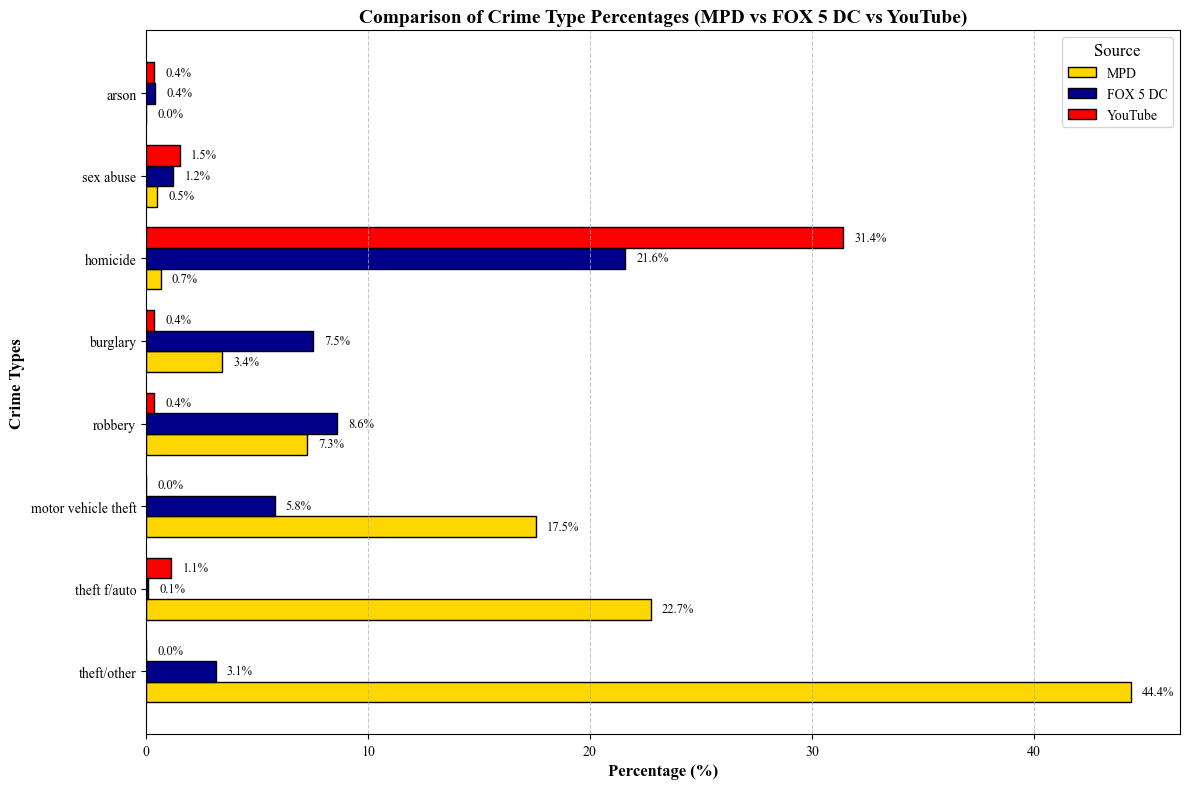

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all crime types by taking the union of indices
all_crime_types = crime_type_percentages_mpd.index \
    .union(crime_type_percentages.index) \
    .union(crime_type_percentages_youtube.index)

# Reindex all datasets to include all crime types and fill missing values with 0
crime_type_percentages_mpd = crime_type_percentages_mpd.reindex(all_crime_types, fill_value=0)
crime_type_percentages = crime_type_percentages.reindex(all_crime_types, fill_value=0)
crime_type_percentages_youtube = crime_type_percentages_youtube.reindex(all_crime_types, fill_value=0)

# Define indices for bar positions
indices = np.arange(len(all_crime_types))

# Set bar width
bar_width = 0.25

# Create the figure and axes
plt.figure(figsize=(12, 8))

# Plot bars for MPD data (Gold)
bars_mpd = plt.barh(indices - bar_width, crime_type_percentages_mpd, bar_width,
                    color='gold', edgecolor='black', label='MPD')

# Plot bars for FOX 5 DC data (Dark Blue)
bars_fox = plt.barh(indices, crime_type_percentages, bar_width,
                    color='darkblue', edgecolor='black', label='FOX 5 DC')

# Plot bars for YouTube data (Red)
bars_youtube = plt.barh(indices + bar_width, crime_type_percentages_youtube, bar_width,
                        color='red', edgecolor='black', label='YouTube')

# Add labels and title
plt.yticks(indices, all_crime_types, fontsize=10)
plt.xlabel('Percentage (%)', fontsize=12, fontweight="bold")
plt.ylabel('Crime Types', fontsize=12, fontweight="bold")
plt.title('Comparison of Crime Type Percentages (MPD vs FOX 5 DC vs YouTube)', fontsize=14, fontweight="bold")

# Add legend (moved to upper right)
plt.legend(title='Source', fontsize=10, title_fontsize=12, loc='upper right')

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels for MPD
for bar in bars_mpd:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", va='center', ha='left', fontsize=9)

# Add percentage labels for FOX 5 DC
for bar in bars_fox:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", va='center', ha='left', fontsize=9)

# Add percentage labels for YouTube
for bar in bars_youtube:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", va='center', ha='left', fontsize=9)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('crime_type_comparison_youtube.jpg', format='jpeg', dpi=300)
plt.show()

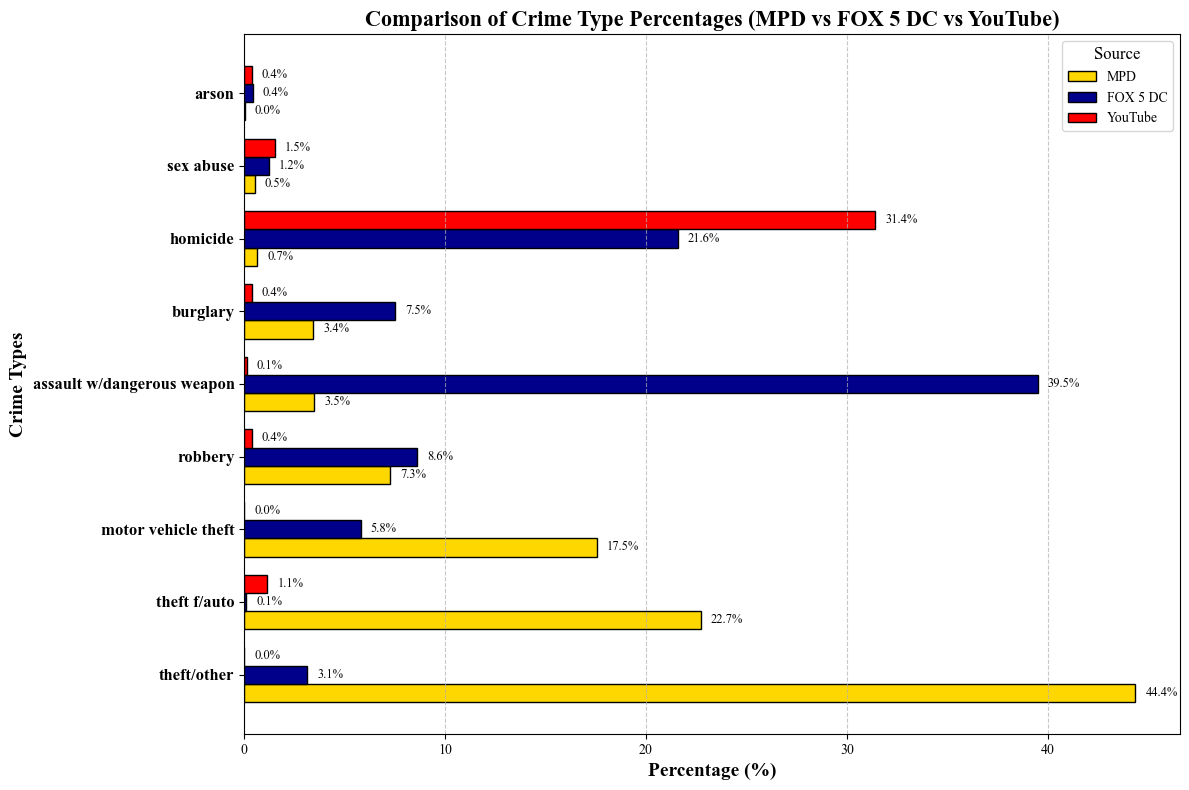

In [87]:
# The above graph does not include the data on assault w/ dangerous weapon. Manually coding the data to develop the graph
# Set font globally to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Define the data
fox5_data = {
    "assault w/dangerous weapon": 39.485981,
    "homicide": 21.588785,
    "None": 12.149533,
    "robbery": 8.598131,
    "burglary": 7.523364,
    "motor vehicle theft": 5.794393,
    "theft/other": 3.130841,
    "sex abuse": 1.214953,
    "arson": 0.420561,
    "theft f/auto": 0.093458
}

mpd_data = {
    "theft/other": 44.354077,
    "theft f/auto": 22.736185,
    "motor vehicle theft": 17.544114,
    "robbery": 7.254375,
    "assault w/dangerous weapon": 3.485586,
    "burglary": 3.442016,
    "homicide": 0.657178,
    "sex abuse": 0.511945,
    "arson": 0.014523
}

youtube_data = {
    "homicide": 31.41,
    "sex abuse": 1.52,
    "assault w/dangerous weapon": 0.13,
    "robbery": 0.38,
    "burglary": 0.38,
    "theft f/auto": 1.14,
    "arson": 0.38,
    "motor vehicle theft": 0.0,
    "theft/other": 0.0
}

fox5_series = fox5_series.drop("None", errors="ignore")
mpd_series = mpd_series.drop("None", errors="ignore")
youtube_series = youtube_series.drop("None", errors="ignore")

# Sort MPD series in ascending order and reverse the order of indices for top-to-bottom display
all_crime_types_sorted = mpd_series.sort_values().index[::-1]

# Reindex all series based on the reversed sorted MPD values
fox5_series = fox5_series.reindex(all_crime_types_sorted)
mpd_series = mpd_series.reindex(all_crime_types_sorted)
youtube_series = youtube_series.reindex(all_crime_types_sorted)

# Plot the graph as before
indices = np.arange(len(all_crime_types_sorted))
bar_width = 0.25

plt.figure(figsize=(12, 8))

# Plot bars for MPD (Gold)
bars_mpd = plt.barh(indices - bar_width, mpd_series, bar_width,
                    color="gold", edgecolor="black", label="MPD")

# Plot bars for FOX 5 DC (Dark Blue)
bars_fox5 = plt.barh(indices, fox5_series, bar_width,
                     color="darkblue", edgecolor="black", label="FOX 5 DC")

# Plot bars for YouTube (Red)
bars_youtube = plt.barh(indices + bar_width, youtube_series, bar_width,
                        color="red", edgecolor="black", label="YouTube")

# Add labels and title
plt.yticks(indices, all_crime_types_sorted, fontsize=12, fontweight="bold")
plt.xlabel("Percentage (%)", fontsize=14, fontweight="bold")
plt.ylabel("Crime Types", fontsize=14, fontweight="bold")
plt.title("Comparison of Crime Type Percentages (MPD vs FOX 5 DC vs YouTube)", fontsize=16, fontweight="bold")

# Add legend
plt.legend(title="Source", title_fontsize=12, fontsize=10, loc="upper right")

# Add grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Add percentage labels for each bar
for bars, series in zip([bars_mpd, bars_fox5, bars_youtube], [mpd_series, fox5_series, youtube_series]):
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                 f"{bar.get_width():.1f}%", va="center", ha="left", fontsize=9)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("crime_type_comparison_no_none.jpg", format="jpeg", dpi=300)
plt.show()

In [57]:
# Function to assign locality codes
def assign_locality_code(address):
    address = address.lower()  # Make address lowercase to handle case-insensitivity
    
    # Check for each locality keyword and return the corresponding numeric value
    if 'sw' in address:
        return 1
    elif 'nw' in address:
        return 2  # Northwest has multiple codes; default to the lowest value
    elif 'ne' in address:
        return 5
    elif 'se' in address:
        return 6  # Southeast has multiple codes; default to the lowest value
    else:
        return None  # Return None for unknown localities

# Apply the function to create a base 'locality' column
mpd['locality'] = mpd['BLOCK'].apply(assign_locality_code)

# Adjust specific cases for multiple codes
mpd['locality'] = mpd.apply(
    lambda row: 3 if row['locality'] == 2 and 'specific condition for NW3' in row['BLOCK'].lower() else row['locality'], 
    axis=1
)
mpd['locality'] = mpd.apply(
    lambda row: 4 if row['locality'] == 2 and 'specific condition for NW4' in row['BLOCK'].lower() else row['locality'], 
    axis=1
)
mpd['locality'] = mpd.apply(
    lambda row: 7 if row['locality'] == 6 and 'specific condition for SE7' in row['BLOCK'].lower() else row['locality'], 
    axis=1
)


In [65]:
# Define a mapping for numeric codes to full locality names
locality_mapping = {
    1.0: "southwest",
    2.0: "northwest",
    3.0: "northwest",
    4.0: "northwest",
    5.0: "northeast",
    6.0: "southeast",
    7.0: "southeast"
}

# Map the numeric locality codes to their full names
mpd['locality_full'] = mpd['locality'].map(locality_mapping)

# Count occurrences of each locality name
locality_counts = mpd['locality_full'].value_counts()

# Calculate percentages
locality_percentages = (locality_counts / locality_counts.sum()) * 100

# Display percentages
print(locality_percentages)


locality_full
northwest    49.755488
northeast    29.389271
southeast    18.167445
southwest     2.687796
Name: count, dtype: float64


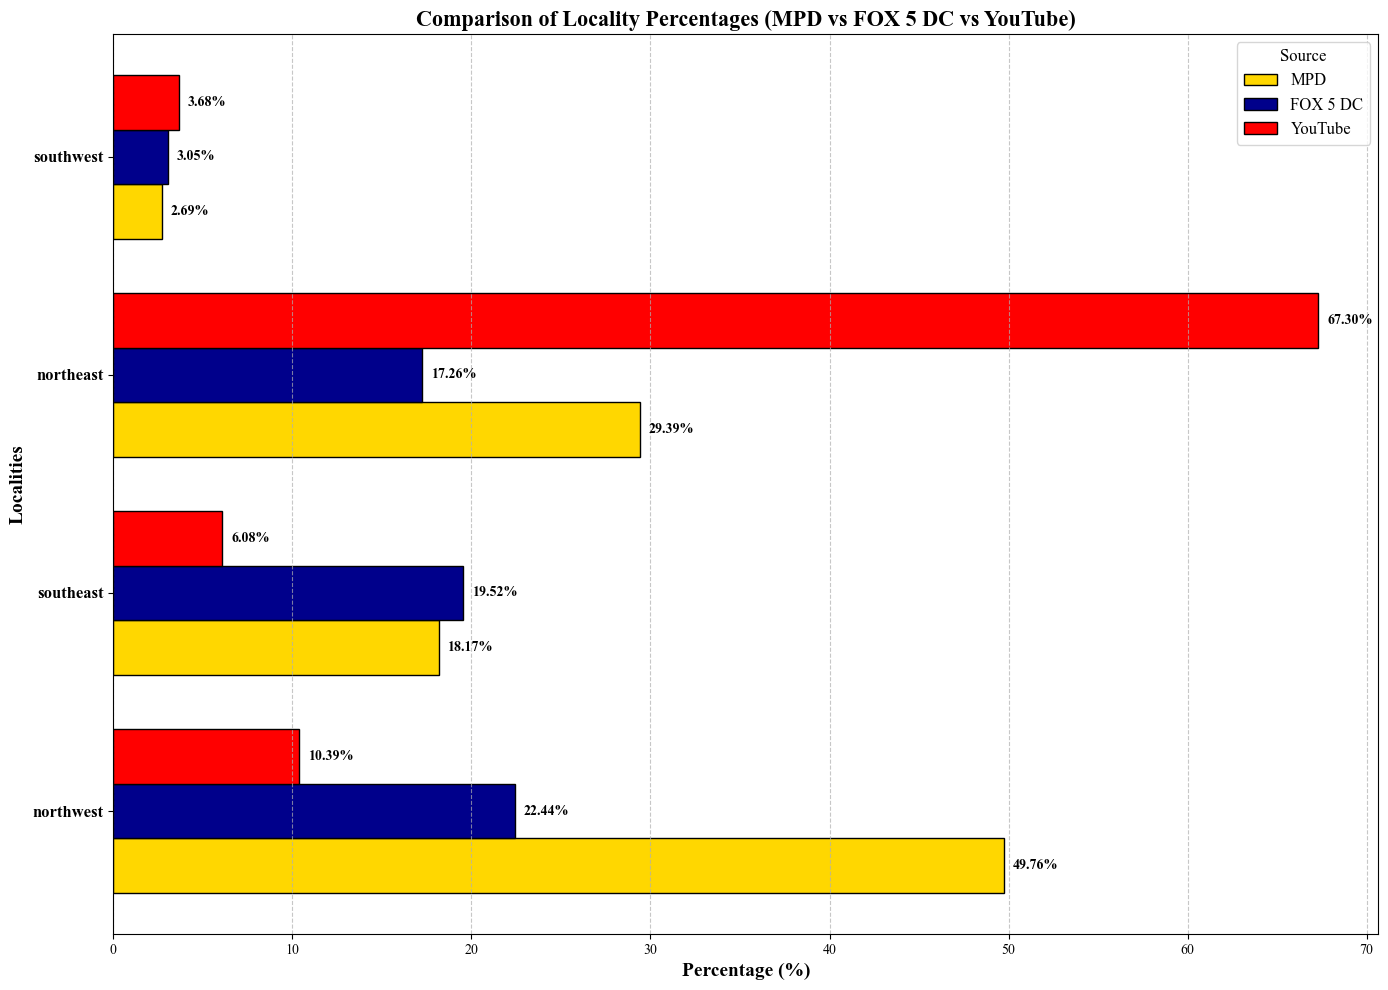

In [71]:
# Set font globally to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# YouTube locality percentages
youtube_locality_data = {
    "northeast": 67.3,
    "northwest": 10.39,
    "southeast": 6.08,
    "southwest": 3.68
}
youtube_locality_percentages = pd.Series(youtube_locality_data)

# Align indices to take the intersection of all three datasets
common_localities = crime_locality_percentages.index \
    .intersection(locality_percentages.index) \
    .intersection(youtube_locality_percentages.index)

# Subset all datasets to include only common localities
crime_locality_percentages = crime_locality_percentages.reindex(common_localities)
locality_percentages = locality_percentages.reindex(common_localities)
youtube_locality_percentages = youtube_locality_percentages.reindex(common_localities)

# Define indices for bar positions
indices = np.arange(len(common_localities))

# Set bar width
bar_width = 0.25

# Create the figure and axes
plt.figure(figsize=(14, 10))

# Plot bars for MPD data (Yellow)
bars_mpd = plt.barh(indices - bar_width, locality_percentages, bar_width,
                    color='gold', edgecolor='black', label='MPD')

# Plot bars for FOX 5 DC data (Dark Blue)
bars_fox = plt.barh(indices, crime_locality_percentages, bar_width,
                    color='darkblue', edgecolor='black', label='FOX 5 DC')

# Plot bars for YouTube data (Red)
bars_youtube = plt.barh(indices + bar_width, youtube_locality_percentages, bar_width,
                        color='red', edgecolor='black', label='YouTube')

# Add labels and title (increased font size and bold)
plt.yticks(indices, common_localities, fontsize=12, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('Localities', fontsize=14, fontweight='bold')
plt.title('Comparison of Locality Percentages (MPD vs FOX 5 DC vs YouTube)', 
          fontsize=16, fontweight='bold')

# Add legend (upper right)
plt.legend(title='Source', fontsize=12, title_fontsize=12, loc='upper right')

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels for MPD
for bar in bars_mpd:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Add percentage labels for FOX 5 DC
for bar in bars_fox:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Add percentage labels for YouTube
for bar in bars_youtube:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('locality_comparison_youtube_bold.jpg', format='jpeg', dpi=300)
plt.show()

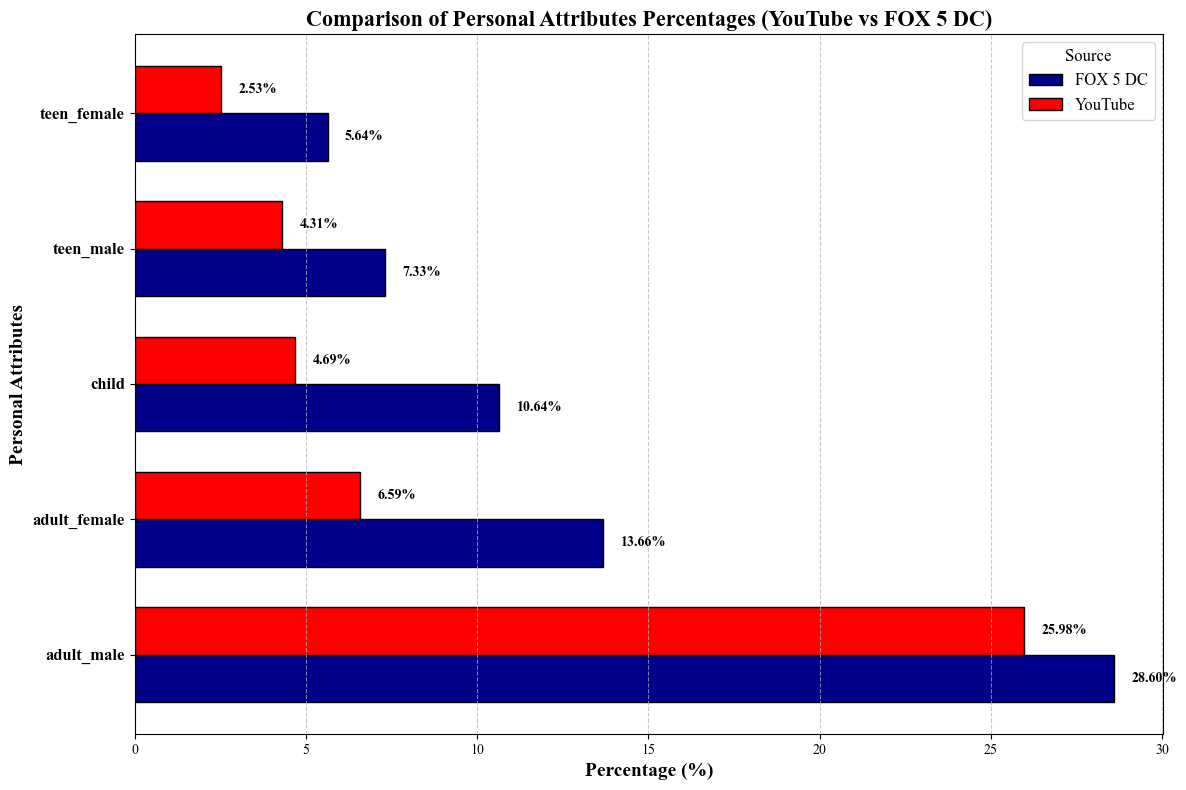

In [73]:
# Set font globally to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# YouTube personal attributes percentages
youtube_personal_data = {
    "adult_male": 25.98,
    "adult_female": 6.59,
    "child": 4.69,
    "teen_male": 4.31,
    "teen_female": 2.53
}
youtube_personal_percentages = pd.Series(youtube_personal_data)

# Align indices to take the intersection of both datasets
common_personal_attributes = personal_characteristics_percentages.index \
    .intersection(youtube_personal_percentages.index)

# Subset both datasets to include only common personal attributes
personal_characteristics_percentages = personal_characteristics_percentages.reindex(common_personal_attributes)
youtube_personal_percentages = youtube_personal_percentages.reindex(common_personal_attributes)

# Define indices for bar positions
indices = np.arange(len(common_personal_attributes))

# Set bar width
bar_width = 0.35

# Create the figure and axes
plt.figure(figsize=(12, 8))

# Plot bars for FOX 5 DC data (Dark Blue)
bars_fox = plt.barh(indices - bar_width / 2, personal_characteristics_percentages, bar_width,
                    color='darkblue', edgecolor='black', label='FOX 5 DC')

# Plot bars for YouTube data (Red)
bars_youtube = plt.barh(indices + bar_width / 2, youtube_personal_percentages, bar_width,
                        color='red', edgecolor='black', label='YouTube')

# Add labels and title
plt.yticks(indices, common_personal_attributes, fontsize=12, fontweight='bold')
plt.xlabel('Percentage (%)', fontsize=14, fontweight='bold')
plt.ylabel('Personal Attributes', fontsize=14, fontweight='bold')
plt.title('Comparison of Personal Attributes Percentages (YouTube vs FOX 5 DC)', 
          fontsize=16, fontweight='bold')

# Add legend (upper right)
plt.legend(title='Source', fontsize=12, title_fontsize=12, loc='upper right')

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add percentage labels for FOX 5 DC
for bar in bars_fox:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Add percentage labels for YouTube
for bar in bars_youtube:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.2f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig('personal_attributes_comparison.jpg', format='jpeg', dpi=300)
plt.show()

/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_26687/1623001797.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, palette="Blues_d")


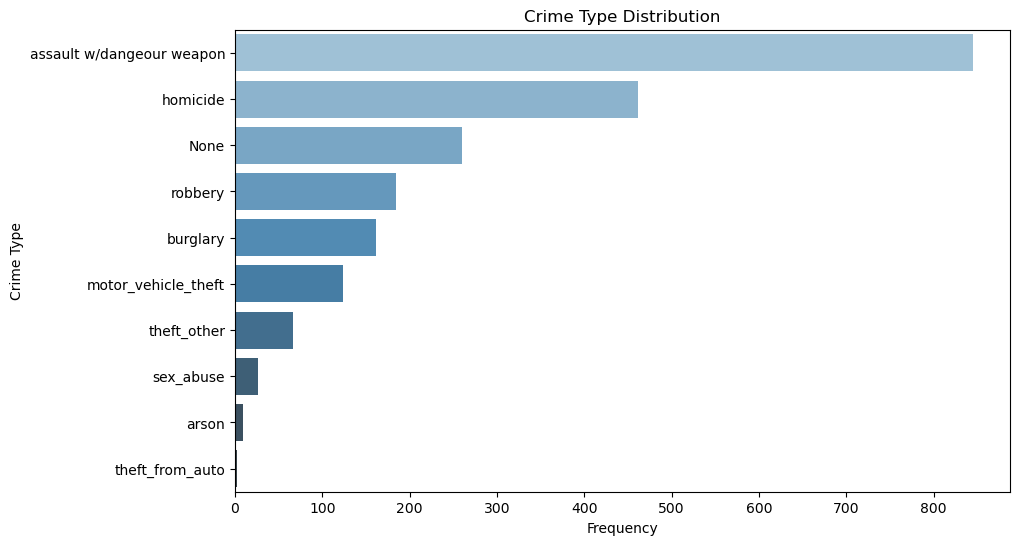

In [77]:
# First create bar plot by type of crime 
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_type_counts.values, y=crime_type_counts.index, palette="Blues_d")
plt.title("Crime Type Distribution")
plt.xlabel("Frequency")
plt.ylabel("Crime Type")
plt.show()

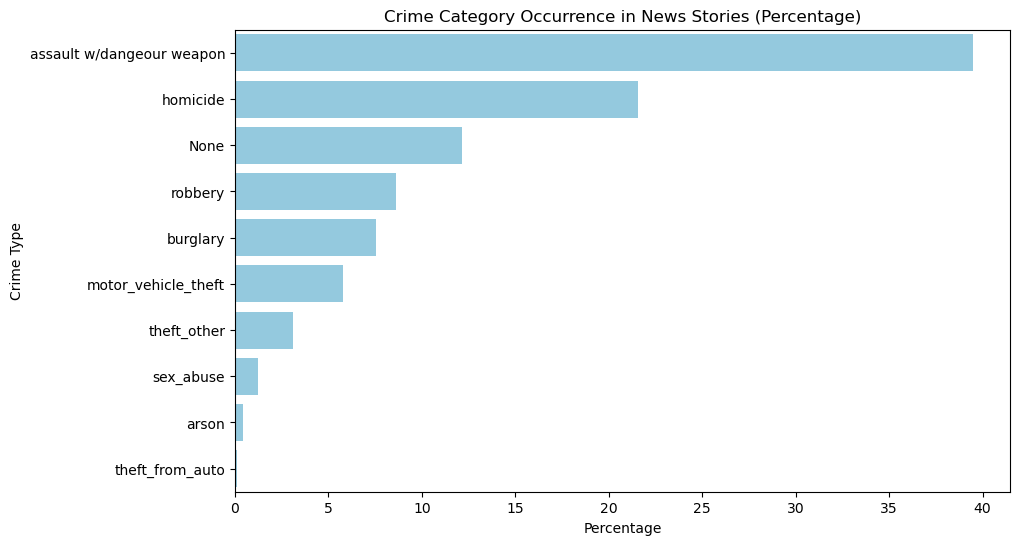

In [83]:
crime_type_percentages = (crime_type_counts / crime_type_counts.sum()) * 100

# Plot the percentages
plt.figure(figsize=(10, 6))
sns.barplot(
    x=crime_type_percentages.values, 
    y=crime_type_percentages.index, 
    color="skyblue"
)

# Add titles and labels
plt.title("Crime Category Occurrence in News Stories (Percentage)")
plt.xlabel("Percentage")
plt.ylabel("Crime Type")
plt.show()

# Save the plot as a .jpg
plt.savefig("crime_category_occurrence.jpg", format="jpg", dpi=300)

# Show the plot
plt.show()

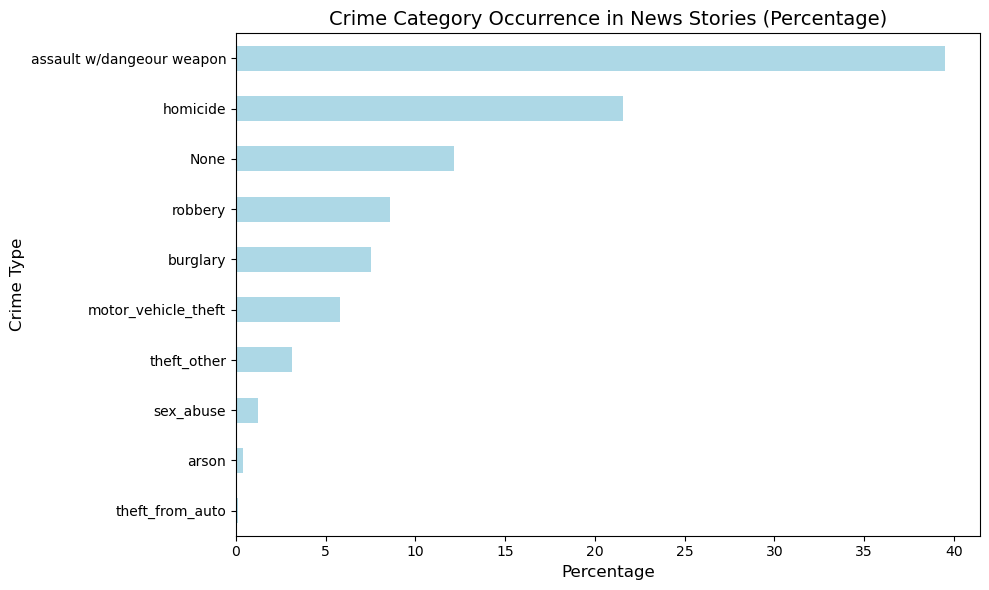

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Sort percentages in descending order and plot as a horizontal bar chart
crime_type_percentages.sort_values(ascending=False).plot(kind="barh", color="lightblue")

# Adding title and labels with specified font sizes
plt.title("Crime Category Occurrence in News Stories (Percentage)", fontsize=14)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Invert the y-axis to keep the highest percentage at the top
plt.gca().invert_yaxis()

# Save the plot as a JPEG file
plt.savefig("news_crime_percentage_desc.jpg", format="jpeg", dpi=300)

# Display the plot
plt.show()

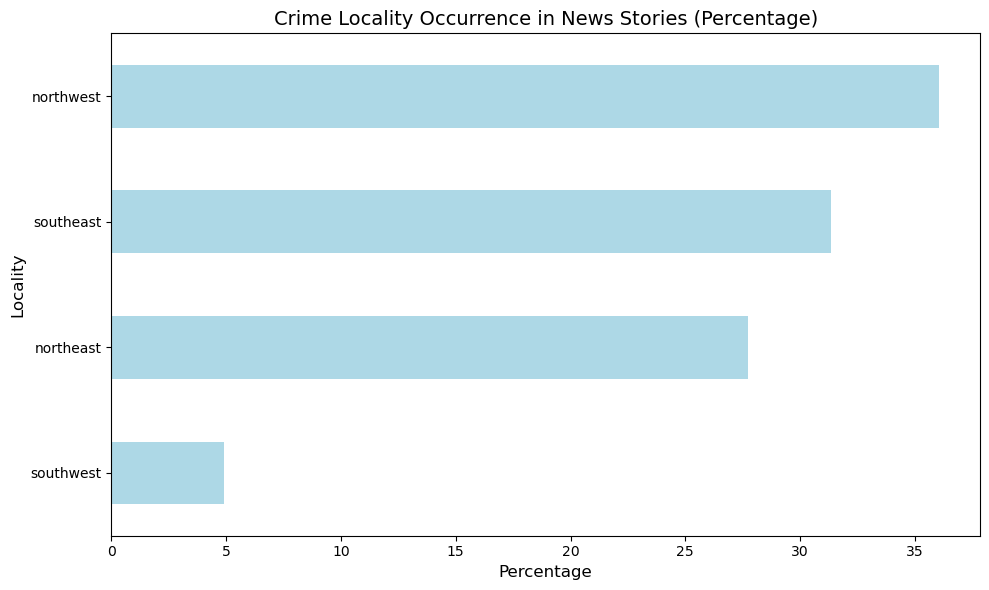

In [97]:
# Calculate percentages for crime locality
crime_locality_percentages = (crime_locality_counts / crime_locality_counts.sum()) * 100

# Sort percentages in descending order
crime_locality_percentages_sorted = crime_locality_percentages.sort_values(ascending=False)

# Plot the percentages as a horizontal bar chart using the specified aesthetic
plt.figure(figsize=(10, 6))
crime_locality_percentages_sorted.plot(kind="barh", color="lightblue")

# Adding title and labels with specified font sizes
plt.title("Crime Locality Occurrence in News Stories (Percentage)", fontsize=14)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Locality", fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Invert the y-axis to keep the highest percentage at the top
plt.gca().invert_yaxis()

# Save the plot as a JPEG file
plt.savefig("news_crime_locality_percentage_desc.jpg", format="jpeg", dpi=300)

# Display the plot
plt.show()

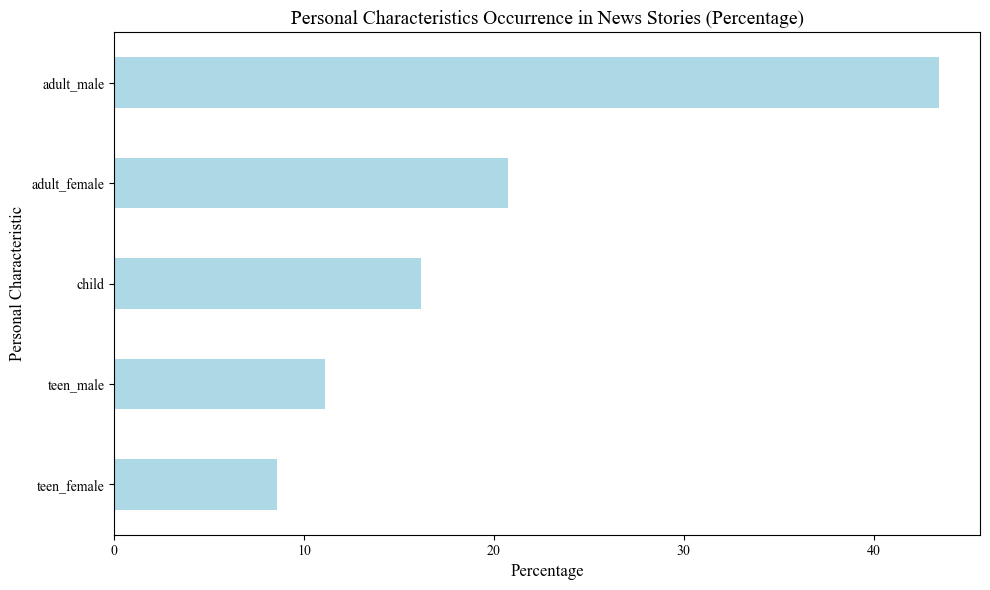

In [102]:
# Now do another one for personal characteristics of victim or perpetrator 
# Drop 'None' category from personal characteristics counts
personal_characteristics_counts = personal_characteristics_counts[personal_characteristics_counts.index != 'None']

# Calculate percentages for personal characteristics
personal_characteristics_percentages = (personal_characteristics_counts / personal_characteristics_counts.sum()) * 100

# Sort percentages in descending order
personal_characteristics_percentages_sorted = personal_characteristics_percentages.sort_values(ascending=False)

# Plot the percentages as a horizontal bar chart using the specified aesthetic
plt.figure(figsize=(10, 6))
personal_characteristics_percentages_sorted.plot(kind="barh", color="lightblue")

# Adding title and labels with specified font sizes
plt.title("Personal Characteristics Occurrence in News Stories (Percentage)", fontsize=14)
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Personal Characteristic", fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Invert the y-axis to keep the highest percentage at the top
plt.gca().invert_yaxis()

# Save the plot as a JPEG file
plt.savefig("news_personal_characteristics_percentage_desc.jpg", format="jpeg", dpi=300)


#### Sentiment analysis for the FOX 5 news stories ####

In [46]:
#Install transformers 
!pip install transformers

In [47]:
# Install tensorflow
!pip install tensorflow

In [53]:
# Install the required libraries
from transformers import pipeline
from tqdm import tqdm

In [55]:
!pip install tf-keras

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.9 MB/s eta 0:00:0000:0100:01


In [57]:
# Load the pre-trained emotion detection model
emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

tf_model.h5:   0%|          | 0.00/329M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use 0


In [59]:
# Function to get the top emotion (valence) from the article
def get_emotion(text):
    try:
        emotions = emotion_model(text)
        return emotions[0]['label']  # Extract the top emotion
    except Exception as e:
        print(f"Error processing text: {text[:50]}...")  # Show a snippet of the text
        print(e)
        return None  # Return None if there's an error

In [61]:
# Test the function on a small sample (5 rows)
sample = crime_related_stories['processed_article'].head(5)
sample_emotions = sample.apply(get_emotion)

print(sample_emotions)  # Display the results for the sample

4     sadness
5       anger
7     sadness
9        fear
10       fear
Name: processed_article, dtype: object


In [63]:
# Add a progress bar to monitor processing
tqdm.pandas()

# Apply emotion detection to the full dataset with progress monitoring
crime_related_stories['emotion'] = crime_related_stories['processed_article'].progress_apply(get_emotion)

  1%|▌                                        | 18/1369 [00:06<06:46,  3.33it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (973 > 512). Running this sequence through the model will result in indexing errors
2024-12-09 15:15:47.238103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,589] = 591 is not in [0, 514)


Error processing text: holiday season full swing fox guid best attract ev...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,589] = 591 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 973), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 973), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


  2%|▊                                        | 28/1369 [00:09<07:14,  3.09it/s]2024-12-09 15:15:50.837273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: democrat governor tap one world largest firm contr...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 524), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 524), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


  5%|██▏                                      | 75/1369 [00:28<08:06,  2.66it/s]2024-12-09 15:16:09.518086: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: vote initi citi council seat gener electionballot ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 592), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 592), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


  6%|██▎                                      | 77/1369 [00:28<06:25,  3.35it/s]2024-12-09 15:16:09.936434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,551] = 553 is not in [0, 514)


Error processing text: presid kamala harri return howard univers elect ni...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,551] = 553 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 907), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 907), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


  6%|██▌                                      | 85/1369 [00:31<07:28,  2.86it/s]2024-12-09 15:16:12.402424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: kamala harrispromis put countri parti stood overfl...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 934), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 934), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 10%|████                                    | 137/1369 [00:47<06:19,  3.24it/s]2024-12-09 15:16:28.296277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,540] = 542 is not in [0, 514)
2024-12-09 15:16:28.306577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,930] = 932 is not in [0, 514)


Error processing text: command revamp defens far best game season last su...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,540] = 542 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 634), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 634), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
Error processing text: bidenset deadlin citi across nation replac lead pi...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,930] = 932 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):


 13%|█████                                   | 172/1369 [00:58<06:01,  3.31it/s]2024-12-09 15:16:39.978915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: embattl call center hot seat expect focu oversight...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 612), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 612), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 13%|█████▏                                  | 177/1369 [01:00<05:32,  3.59it/s]2024-12-09 15:16:41.316927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: fake special polic offic work fox check variou off...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 589), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 589), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 16%|██████▎                                 | 214/1369 [01:15<09:10,  2.10it/s]2024-12-09 15:16:56.468565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: new report american civil liberti union reveal tro...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 537), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 537), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 19%|███████▌                                | 260/1369 [01:31<06:27,  2.86it/s]2024-12-09 15:17:12.693380: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,589] = 591 is not in [0, 514)


Error processing text: metropolitan polic depart offici across region rem...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,589] = 591 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 605), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 605), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 20%|████████▏                               | 280/1369 [01:38<05:47,  3.13it/s]2024-12-09 15:17:19.234403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,513] = 515 is not in [0, 514)


Error processing text: council chairman phil mendelson confirm sunday war...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,513] = 515 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 591), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 591), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 21%|████████▎                               | 283/1369 [01:38<05:15,  3.44it/s]2024-12-09 15:17:20.014532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: councilmemb trayon whitewa arrest sunday crimin co...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 592), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 592), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 22%|████████▋                               | 299/1369 [01:42<04:49,  3.70it/s]2024-12-09 15:17:23.872313: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: updat chaotic morn around nation capit multipl tor...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1962), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1962), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 22%|████████▉                               | 308/1369 [01:45<07:08,  2.47it/s]2024-12-09 15:17:26.934386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: tuesday polic depart across entir greater region h...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 529), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 529), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 23%|█████████▏                              | 316/1369 [01:47<04:53,  3.59it/s]2024-12-09 15:17:29.111346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: boy dead fight life hospit doubl shoot erupt busi ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 525), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 525), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 25%|█████████▉                              | 341/1369 [01:56<08:02,  2.13it/s]2024-12-09 15:17:37.634878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,713] = 715 is not in [0, 514)


Error processing text: prime minist benjamin netanyahu sought bolster sup...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,713] = 715 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 972), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 972), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 27%|██████████▋                             | 365/1369 [02:05<06:05,  2.75it/s]2024-12-09 15:17:46.247275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,621] = 623 is not in [0, 514)


Error processing text: attorney gener brian schwalb announc tuesday swahi...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,621] = 623 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 646), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 646), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 27%|██████████▊                             | 372/1369 [02:07<07:31,  2.21it/s]2024-12-09 15:17:48.933094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: vanc never trumper eight year ago serv vice presid...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 517), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 517), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 28%|███████████▏                            | 382/1369 [02:10<04:11,  3.93it/s]2024-12-09 15:17:51.345551: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: woman dead struck fall tree branch park wednesday ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 29%|███████████▋                            | 399/1369 [02:16<05:32,  2.92it/s]2024-12-09 15:17:57.268817: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: commut visit next week urg awar traffic delay due ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 534), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 534), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 31%|████████████▌                           | 431/1369 [02:26<05:57,  2.62it/s]2024-12-09 15:18:07.877470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: biden licens practic law district columbia suspend...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 604), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 604), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 33%|█████████████                           | 445/1369 [02:31<06:32,  2.35it/s]2024-12-09 15:18:12.950193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,540] = 542 is not in [0, 514)


Error processing text: stolen car stori go viral share seen thousand time...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,540] = 542 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 646), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 646), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 34%|█████████████▋                          | 470/1369 [02:39<04:42,  3.18it/s]2024-12-09 15:18:20.351600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,540] = 542 is not in [0, 514)


Error processing text: gaithersburg injur sever weather includ tornado sw...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,540] = 542 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 626), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 626), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 35%|██████████████                          | 481/1369 [02:41<04:34,  3.24it/s]2024-12-09 15:18:23.185079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: resid head poll tuesday june cast ballot inth demo...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 596), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 596), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 38%|███████████████▎                        | 522/1369 [02:53<03:38,  3.87it/s]2024-12-09 15:18:34.293850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: briann nadeau releas redact version independ couns...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 661), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 661), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 41%|████████████████▎                       | 560/1369 [03:06<06:14,  2.16it/s]2024-12-09 15:18:47.704141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: presid georg univers call ongo protest encamp camp...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 856), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 856), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 41%|████████████████▌                       | 567/1369 [03:08<04:08,  3.23it/s]2024-12-09 15:18:49.684853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: jone say thought prankster line answer telephon he...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 638), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 638), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 42%|████████████████▉                       | 579/1369 [03:12<03:23,  3.89it/s]2024-12-09 15:18:53.425419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: georg universityinwashington shown sign let citi l...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 736), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 736), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 43%|█████████████████▏                      | 587/1369 [03:14<05:18,  2.46it/s]2024-12-09 15:18:56.214170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: demonstr war continu georg univers nation capit mo...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 828), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 828), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 44%|█████████████████▋                      | 606/1369 [03:20<02:37,  4.86it/s]

Error processing text: kentucki man storm capitol carri confeder battl fl...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,525] = 527 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 653), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 653), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


2024-12-09 15:19:01.514996: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: attorney dc announc result feder partnership targe...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 625), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 625), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 50%|████████████████████▏                   | 689/1369 [03:48<05:45,  1.97it/s]2024-12-09 15:19:29.300414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: hart wipe away tear stage look bronz bust pedest t...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 540), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 540), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 51%|████████████████████▏                   | 693/1369 [03:49<04:14,  2.65it/s]2024-12-09 15:19:30.415953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: year doctor hit kill driver stole car anorthwest f...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 546), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 546), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 55%|██████████████████████                  | 755/1369 [04:07<01:44,  5.90it/s]

Error processing text: new survey rank sought school district unit state ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,550] = 552 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1597), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1597), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 57%|██████████████████████▉                 | 785/1369 [04:15<02:20,  4.16it/s]2024-12-09 15:19:56.647041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: go snow weekend sign point ye snow lover maryland ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 587), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 587), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 58%|███████████████████████▏                | 794/1369 [04:18<03:16,  2.93it/s]2024-12-09 15:19:59.753129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: arrest man accus shoot three offic earli wednesday...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 586), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 586), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 60%|███████████████████████▉                | 818/1369 [04:25<02:36,  3.51it/s]2024-12-09 15:20:07.103038: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,532] = 534 is not in [0, 514)


Error processing text: council hold first two vote tuesday citi newest cr...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,532] = 534 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 890), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 890), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 60%|████████████████████████▏               | 827/1369 [04:27<01:39,  5.46it/s]

Error processing text: death mike gill father three former govern offici ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 894), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 894), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 61%|████████████████████████▎               | 830/1369 [04:28<02:15,  3.99it/s]2024-12-09 15:20:09.662938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)
2024-12-09 15:20:09.670163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: gill marri father three also member former preside...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
Error processing text: learn mike gill die injuri sustain monday januari ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):


 62%|████████████████████████▋               | 845/1369 [04:32<02:51,  3.06it/s]2024-12-09 15:20:13.965008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,663] = 665 is not in [0, 514)


Error processing text: unit state wednesday attribut drone attack kill th...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,663] = 665 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 930), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 930), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 62%|████████████████████████▋               | 847/1369 [04:33<02:11,  3.96it/s]2024-12-09 15:20:14.293846: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: small memori grow man kill ina violent crime spree...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 533), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 533), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 62%|████████████████████████▊               | 849/1369 [04:33<01:42,  5.05it/s]2024-12-09 15:20:14.526881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: standard set recent year winter alreadi bad snowfa...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 810), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 810), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 63%|█████████████████████████▎              | 865/1369 [04:39<02:21,  3.55it/s]2024-12-09 15:20:20.641699: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,589] = 591 is not in [0, 514)


Error processing text: notifi three differ incid student rob mckinley mid...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,589] = 591 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 979), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 979), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 64%|█████████████████████████▍              | 870/1369 [04:40<02:35,  3.22it/s]2024-12-09 15:20:21.967451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: look top dri januari mind drink festi bring perfec...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 544), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 544), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 65%|██████████████████████████              | 891/1369 [04:46<01:35,  4.99it/s]

Error processing text: two year last significantsnowfal immediatewashingt...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 603), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 603), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 65%|██████████████████████████              | 893/1369 [04:47<02:11,  3.63it/s]2024-12-09 15:20:28.374237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: year gener victori movement thousand oppon abort r...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 546), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 546), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 66%|██████████████████████████▌             | 909/1369 [04:51<01:36,  4.78it/s]

Error processing text: offici first time nearli two year inch snow record...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 2304), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 2304), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 67%|██████████████████████████▊             | 917/1369 [04:53<02:00,  3.75it/s]2024-12-09 15:20:35.130651: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: councilmemb brook pinto introduc public safeti leg...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 578), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 578), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 67%|██████████████████████████▉             | 923/1369 [04:54<01:20,  5.56it/s]

Error processing text: trumpreturn first time month feder courthous appea...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 766), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 766), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 69%|███████████████████████████▋            | 948/1369 [05:01<02:02,  3.45it/s]2024-12-09 15:20:43.090319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: rear view mirror welcom new year first chanc winte...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 912), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 912), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 70%|████████████████████████████▏           | 964/1369 [05:05<01:29,  4.54it/s]2024-12-09 15:20:46.733525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,532] = 534 is not in [0, 514)


Error processing text: start winter year someth sinc snow alreadi record ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,532] = 534 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 893), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 893), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 71%|████████████████████████████▍           | 973/1369 [05:07<01:59,  3.31it/s]2024-12-09 15:20:49.204791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)
2024-12-09 15:20:49.213015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,575] = 577 is not in [0, 514)


Error processing text: holiday season full swing fox guid best attract ev...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 674), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 674), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
Error processing text: holiday season full swing fox guid best attract ev...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,575] = 577 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):


 72%|████████████████████████████▊           | 987/1369 [05:11<01:22,  4.65it/s]2024-12-09 15:20:52.242027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,558] = 560 is not in [0, 514)


Error processing text: former leader boysextremist group sentenc tuesday ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,558] = 560 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 574), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 574), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 75%|█████████████████████████████▎         | 1029/1369 [05:21<01:15,  4.52it/s]2024-12-09 15:21:02.943605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,527] = 529 is not in [0, 514)


Error processing text: mayorandpolic chiefsat member congress wednesday a...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,527] = 529 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 543), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 543), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 76%|█████████████████████████████▌         | 1037/1369 [05:23<01:01,  5.38it/s]

Error processing text: le three week christma holiday area aglow lit tree...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 853), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 853), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 78%|██████████████████████████████▌        | 1071/1369 [05:35<01:17,  3.83it/s]

Error processing text: ladyjil bidenunveil offici white hous holiday deco...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1182), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1182), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 79%|██████████████████████████████▊        | 1081/1369 [05:37<01:19,  3.63it/s]2024-12-09 15:21:18.801238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: princ georg counti man await trial alleg role homi...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 561), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 561), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 80%|███████████████████████████████▎       | 1098/1369 [05:42<01:24,  3.22it/s]2024-12-09 15:21:23.889733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: popular social medium food guid instagramand x lis...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 518), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 518), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 81%|███████████████████████████████▍       | 1103/1369 [05:44<01:30,  2.95it/s]2024-12-09 15:21:25.522288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: march israel protest believ peopl around countri c...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 883), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 883), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 81%|███████████████████████████████▋       | 1111/1369 [05:46<01:18,  3.29it/s]2024-12-09 15:21:27.597472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,544] = 546 is not in [0, 514)


Error processing text: mayormuriel bowserha declar public emerg district ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,544] = 546 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 802), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 802), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 82%|████████████████████████████████       | 1127/1369 [05:51<01:46,  2.27it/s]2024-12-09 15:21:33.006761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: food deliveri driver becam victim violent carjack ...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 520), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 84%|████████████████████████████████▉      | 1156/1369 [06:00<00:56,  3.79it/s]2024-12-09 15:21:41.667539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,552] = 554 is not in [0, 514)


Error processing text: coalit legal team announc thursday file lawsuit di...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,552] = 554 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 556), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 556), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 86%|█████████████████████████████████▌     | 1179/1369 [06:07<00:49,  3.80it/s]2024-12-09 15:21:48.497680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: dunbar high school senior danc plan saturday postp...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 604), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 604), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 89%|██████████████████████████████████▊    | 1220/1369 [06:19<00:43,  3.40it/s]2024-12-09 15:22:01.172209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,529] = 531 is not in [0, 514)


Error processing text: arrest wednesday protestsbrok oncapitol hill demon...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,529] = 531 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 731), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 731), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 91%|███████████████████████████████████▎   | 1241/1369 [06:26<00:44,  2.86it/s]2024-12-09 15:22:07.413507: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: housejudiciari committe held hear thursday bill me...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 579), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 579), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 91%|███████████████████████████████████▍   | 1246/1369 [06:27<00:30,  4.01it/s]2024-12-09 15:22:08.401220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: man face charg convolut crime shot two suspect all...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 585), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 585), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 91%|███████████████████████████████████▌   | 1250/1369 [06:28<00:33,  3.54it/s]2024-12-09 15:22:09.454442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: keep eye crime commun look notabl stori across dmv...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 721), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 721), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 92%|███████████████████████████████████▉   | 1262/1369 [06:32<00:44,  2.39it/s]2024-12-09 15:22:13.461833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: mayormuriel bowserand law enforc leader announc ar...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 561), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 561), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 92%|████████████████████████████████████   | 1265/1369 [06:32<00:32,  3.24it/s]2024-12-09 15:22:14.126653: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,558] = 560 is not in [0, 514)


Error processing text: increas homicid increas carjack crime nation headl...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,558] = 560 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 567), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 567), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 93%|████████████████████████████████████▍  | 1277/1369 [06:36<00:25,  3.62it/s]2024-12-09 15:22:17.652137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: love panda clutch diari kelsey lambert bubbl excit...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 1034), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 1034), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 95%|████████████████████████████████████▉  | 1298/1369 [06:41<00:15,  4.70it/s]2024-12-09 15:22:22.547411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,621] = 623 is not in [0, 514)


Error processing text: offici seen homicid year accord metropolitan polic...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,621] = 623 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 641), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 641), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 95%|█████████████████████████████████████▏ | 1306/1369 [06:43<00:16,  3.90it/s]2024-12-09 15:22:24.303056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,512] = 514 is not in [0, 514)


Error processing text: front door cru hookah loung h street lock tragic s...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 809), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 809), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 96%|█████████████████████████████████████▌ | 1318/1369 [06:46<00:14,  3.55it/s]2024-12-09 15:22:27.725870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[0,558] = 560 is not in [0, 514)


Error processing text: keep eye crime commun look notabl stori across dmv...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,558] = 560 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 568), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 568), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


 98%|██████████████████████████████████████▍| 1348/1369 [06:54<00:05,  4.10it/s]

Error processing text: keep eye crime commun look notabl stori across dmv...
Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,512] = 514 is not in [0, 514) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 696), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 696), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False


100%|███████████████████████████████████████| 1369/1369 [07:01<00:00,  3.25it/s]
/var/folders/_z/s48g8l_j0fs5ds8dsqgj7djw0000gn/T/ipykernel_26687/3007433585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_related_stories['emotion'] = crime_related_stories['processed_article'].progress_apply(get_emotion)


In [65]:
print(crime_related_stories['emotion'].value_counts())

emotion
fear        611
anger       260
sadness     244
joy         108
surprise     44
neutral      25
Name: count, dtype: int64


In [67]:
# Drop 'None' category from each of the classification columns
crime_related_stories = crime_related_stories[crime_related_stories['crime_type'] != 'None']
crime_related_stories = crime_related_stories[crime_related_stories['locality'] != 'None']
crime_related_stories = crime_related_stories[crime_related_stories['personal_characteristics'] != 'None']

KeyError: 'locality'

In [69]:
# Cross reference by crime type
# Group by crime type and emotion to see the distribution
emotion_by_crime = crime_related_stories.groupby(['crime_type', 'emotion']).size().reset_index(name='count')

# Filter out 'None' categories
emotion_by_crime = emotion_by_crime[emotion_by_crime['crime_type'] != 'None']

# Display the result
print(emotion_by_crime)

                    crime_type  emotion  count
0    assault w/dangeour weapon    anger     58
1    assault w/dangeour weapon     fear    178
2    assault w/dangeour weapon      joy     18
3    assault w/dangeour weapon  neutral      3
4    assault w/dangeour weapon  sadness     44
..                         ...      ...    ...
133                  sex_abuse     fear      4
134                  sex_abuse      joy      1
135                theft_other    anger      4
136                theft_other     fear      5
137                theft_other  sadness      1

[138 rows x 3 columns]


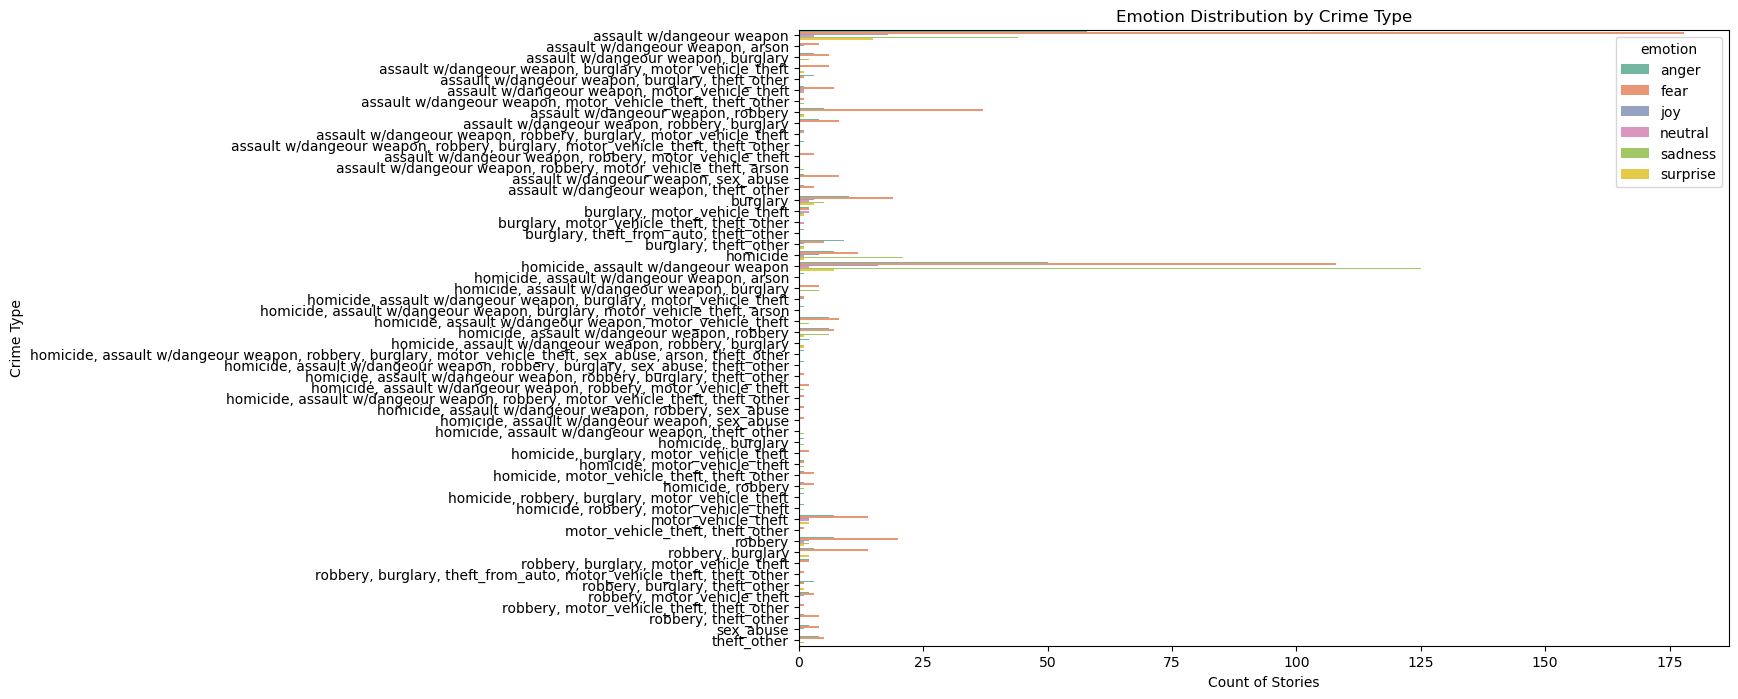

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size for better readability
plt.figure(figsize=(12, 8))

# Create a grouped bar plot for emotion distribution by crime type
sns.barplot(x='count', y='crime_type', hue='emotion', data=emotion_by_crime, palette='Set2')

# Add title and labels
plt.title('Emotion Distribution by Crime Type')
plt.xlabel('Count of Stories')
plt.ylabel('Crime Type')

# Show the plot
plt.show()

In [73]:
# Group by locality and emotion
emotion_by_locality = crime_related_stories.groupby(['locality', 'emotion']).size().reset_index(name='count')

# Filter out 'None' categories
emotion_by_locality = emotion_by_locality[emotion_by_locality['locality'] != 'None']

# Display the result
print(emotion_by_locality)

KeyError: 'locality'

In [100]:
import tensorflow as tf
print(tf.__version__)

2024-12-09 15:00:49.280749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.16.2


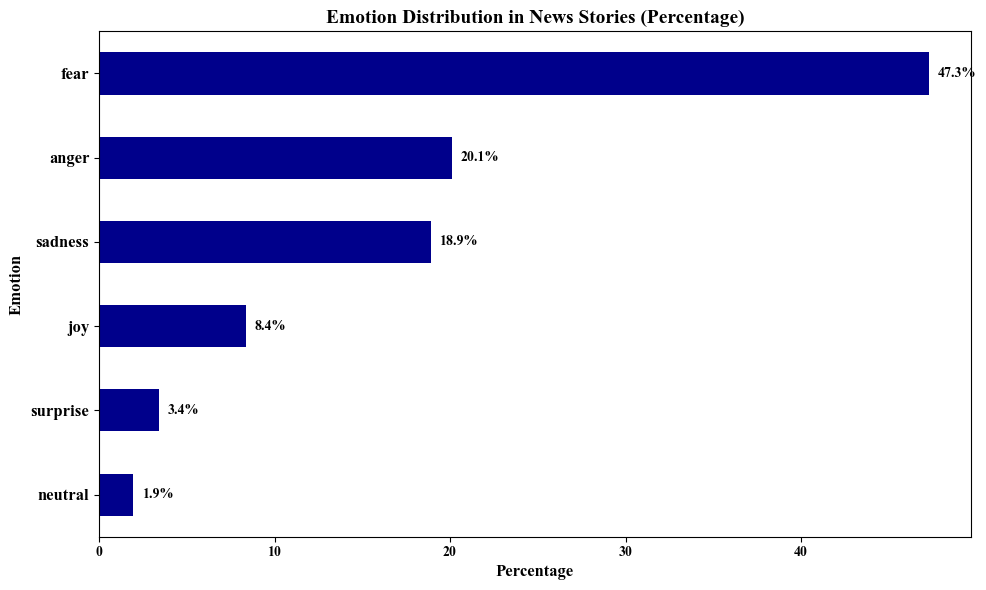

In [111]:
# Emotion counts
emotion_counts = {
    'fear': 611,
    'anger': 260,
    'sadness': 244,
    'joy': 108,
    'surprise': 44,
    'neutral': 25
}

# Convert to pandas Series for easier manipulation
emotion_counts_series = pd.Series(emotion_counts)

# Calculate percentages for emotions
emotion_percentages = (emotion_counts_series / emotion_counts_series.sum()) * 100

# Sort percentages in descending order
emotion_percentages_sorted = emotion_percentages.sort_values(ascending=False)

# Plot the percentages as a horizontal bar chart using dark blue color
plt.figure(figsize=(10, 6))
bars = emotion_percentages_sorted.plot(kind="barh", color="darkblue")

# Adding title and labels with specified font sizes
plt.title("Emotion Distribution in News Stories (Percentage)", fontsize=14, fontweight='bold')
plt.xlabel("Percentage", fontsize=12, fontweight='bold')
plt.ylabel("Emotion", fontsize=12, fontweight='bold')

# Update y-axis labels with Times New Roman and bold
plt.gca().set_yticklabels(emotion_percentages_sorted.index, fontsize=12, fontweight='bold', family='Times New Roman')

# Add percentage labels for each bar
for bar in bars.patches:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{bar.get_width():.1f}%", va='center', ha='left', fontsize=10, fontweight='bold')

# Adjust layout for better readability
plt.tight_layout()

# Invert the y-axis to keep the highest percentage at the top
plt.gca().invert_yaxis()

# Save the plot as a JPEG file
plt.savefig("emotion_distribution_percentage_desc_with_labels.jpg", format="jpeg", dpi=300)

# Display the plot
plt.show()